In [1]:
%pylab inline
import scf_utils

Populating the interactive namespace from numpy and matplotlib


In [2]:
coeff_filename = "../../data/expansion/MWLMC5_snap_1e6/BFE_LMC5_all_grav_MO5_ss_COM_n20_20_nsamp_1e6_sat_snap_"


In [3]:
coeff, exp_order, exp_params, rcom = scf_utils.read_coefficients(coeff_filename+"140")

In [4]:
print(rcom)

[[ -9.55257514 -38.55362541  63.33117139]]


In [5]:
#scf = scf_utils.SCF_coeff(coeff ,exp_order[0], exp_order[1], exp_order[2])

In [6]:
print(np.shape(coeff))
Snlm = coeff[0]
Tnlm = coeff[1]
varSnlm = coeff[2]
varTnlm = coeff[3]
varSTnlm = coeff[4]
pmass = exp_params[1]
rs = exp_params[0]

(5, 21, 21, 21)


In [7]:
# Smoothed coefficients.

In [8]:
vis = scf_utils.SCFvis(Snlm, Tnlm, exp_order[0], exp_order[1], exp_order[2])

/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:291: RuntimeWarning: divide by zero encountered in log10
  im1 = ax[0].imshow(np.log10(np.abs(self.Snlm[:,:,m])).T, origin='lower', cmap='viridis')
/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:292: RuntimeWarning: divide by zero encountered in log10
  im2 = ax[1].imshow(np.log10(np.abs(self.Tnlm[:,:,m])).T, origin='lower', cmap='viridis')


0

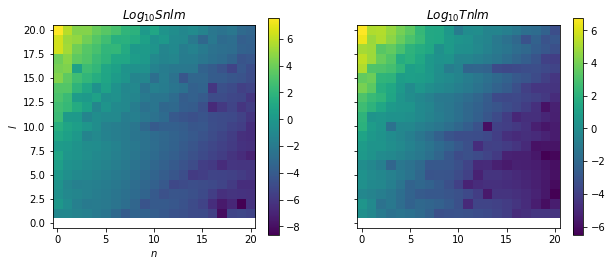

In [9]:
vis.hist_scf(m=1, axis=1)

0

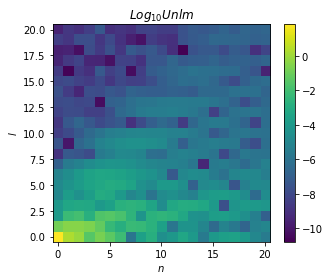

In [10]:
vis.hist_energy(m=0)

In [16]:
Snlm_smooth, Tnlm_smooth, N_coeff = scf_utils.smooth_coefficients_matrix(Snlm, Tnlm, varSnlm, varTnlm, 
                                                                         varSTnlm, pmass, sn_threshold=5, SN=False)

/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:132: RuntimeWarning: invalid value encountered in double_scalars
  bTnlm = 1 / (1 + (varTnlm/Tnlm**2))
/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:131: RuntimeWarning: invalid value encountered in double_scalars
  bSnlm = 1 / (1 + (varSnlm/Snlm**2))
/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:173: RuntimeWarning: invalid value encountered in double_scalars
  SN_coeff_unc = (S_unc**2/varS)**0.5


In [17]:
vis_smooth = scf_utils.SCFvis(Snlm_smooth, Tnlm_smooth, exp_order[0], exp_order[1], exp_order[2])

/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:291: RuntimeWarning: divide by zero encountered in log10
  im1 = ax[0].imshow(np.log10(np.abs(self.Snlm[:,:,m])).T, origin='lower', cmap='viridis')
/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:292: RuntimeWarning: divide by zero encountered in log10
  im2 = ax[1].imshow(np.log10(np.abs(self.Tnlm[:,:,m])).T, origin='lower', cmap='viridis')


0

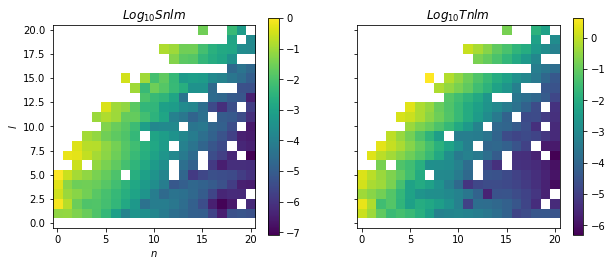

In [18]:
vis_smooth.hist_scf(m=1, axis=1)

0

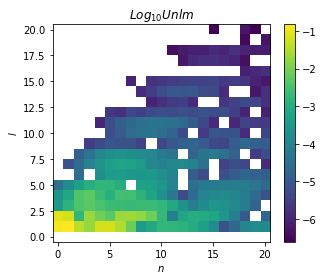

In [19]:
vis_smooth.hist_energy(m=1)

/tmp/ipykernel_69595/437668097.py:1: RuntimeWarning: divide by zero encountered in log10
  imshow(np.log10(Snlm_smooth[:,:,0]**2 + Tnlm_smooth[:,:,0]**2).T, origin='lower')


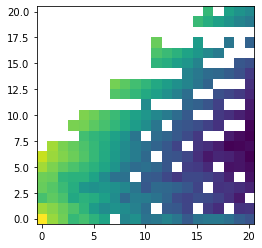

In [20]:
imshow(np.log10(Snlm_smooth[:,:,0]**2 + Tnlm_smooth[:,:,0]**2).T, origin='lower')

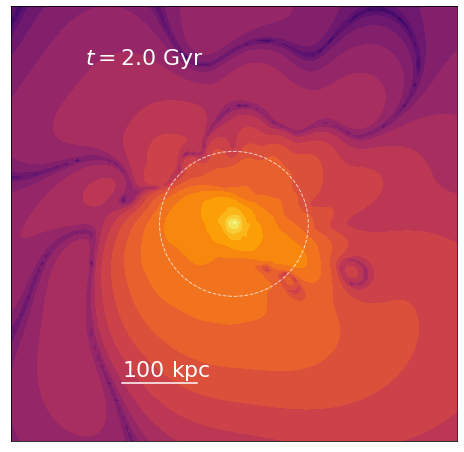

In [21]:
vis_smooth.density_contour(Snlm_smooth, Tnlm_smooth, [-300, 300], pmass, rs, 100 )

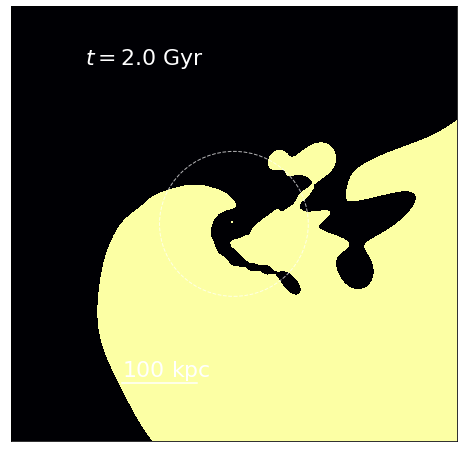

In [24]:
vis_smooth.density_contour(Snlm, Tnlm, [-300, 300], pmass, rs, 100, delta_rho=True)

In [5]:
Smw_jnlm, Tmw_jnlm, rcom, mw_exp_params =  scf_utils.array_coefficients(coeff_filename, 0, 100)